In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from pandas.core.frame import DataFrame

In [2]:
path = ('/Users/njxwq/Desktop/ipynb/big_data/measurement_data/Bearing1_4') #define the path where the data is stored

In [3]:
def get_files(path):
    files =os.listdir(path)
    files.sort()
    list= []
    for file in files:
        if not  os.path.isdir(path +file):        
            f_name = str(file)
            tr = '/'   
            filename = path + tr + f_name
            name, typename = filename.split('.')
            if typename == 'csv':
                if len(f_name) == 13:
                    list.append(filename)
    return list

In [4]:
list1 = get_files(path)

In [5]:
def transform_new(data): #transform the data to suitable form, and consider hour/minute in datatime because of all files
    data = data.iloc[:,0].str.split(';', expand = True)
    data.columns = ['hour', 'minute', 'second', 'microsecond', 'hori_acc', 'ver_acc']
    data[['hour', 'minute','second',  'microsecond', 'hori_acc', 'ver_acc']] = data[['hour', 'minute','second', 'microsecond', 'hori_acc', 'ver_acc']].astype(float)
    data['datatime'] = data['hour'] + data['minute']/60 + data['second']/3600
    data.drop('hour', axis = 1, inplace = True)
    data.drop('minute', axis = 1, inplace = True)
    data.drop('second', axis = 1, inplace = True)
    data.drop('microsecond', axis = 1, inplace = True)
    
    data.insert(0, 'datatime', data.pop('datatime'))
    
    return data

In [6]:
def mean_median(list):  #for each file, collect the mean and mid value of features hori_acc and ver_acc
    list_datatime = []
    list_mean_hori = []
    list_mean_ver = []
    list_mid_hori = []
    list_mid_ver = []
    for file in list:
        df1 = pd.read_csv(file)
        df = transform_new(df1)
        list_mean_hori.append(np.mean(df['hori_acc']))
        list_mean_ver.append(np.mean(df['ver_acc']))
        list_mid_hori.append(np.median(df['hori_acc']))
        list_mid_ver.append(np.median(df['ver_acc']))
        list_datatime.append(df['datatime'][0])
    
    return list_mean_hori, list_mean_ver, list_mid_hori, list_mid_ver, list_datatime


In [7]:
list_mean_hori, list_mean_ver, list_mid_hori, list_mid_ver, list_datatime = mean_median(list1) #get features list

In [8]:
dict1 = {'mean_hori': list_mean_hori, 'mean_ver': list_mean_ver, 
         'median_hori': list_mid_hori, 'median_ver': list_mid_ver, 'datatime': list_datatime}
df = DataFrame(dict1)  #transform list to dataframe which is easy to be plotted

In [9]:
df  #check the new dataframe

,mean_hori,mean_ver,median_hori,median_ver,datatime
0,0.006363,0.001671,0.003,0.014,8.133333
1,-0.009000,0.006691,-0.013,0.012,8.136111
2,-0.006220,-0.008295,-0.011,0.005,8.138889
3,-0.005819,-0.001751,0.002,0.009,8.141667
4,-0.002016,0.006631,-0.009,0.002,8.144444
...,...,...,...,...,...
1423,0.049849,-0.328044,-0.004,-0.303,12.086111
1424,-0.113160,-0.034839,-0.271,-0.090,12.088889
1425,-0.165236,0.069288,-0.256,-0.046,12.091667
1426,-0.145662,0.268255,-0.234,0.329,12.094444


In [10]:
data1 = pd.read_csv('Bearing1_4_health_state.csv')  #read the label file

In [11]:
data1

,Unnamed: 0,file,state
0,0,acc_00001.csv,0
1,1,acc_00002.csv,0
2,2,acc_00003.csv,0
3,3,acc_00004.csv,0
4,4,acc_00005.csv,0
...,...,...,...
1423,1423,acc_01424.csv,2
1424,1424,acc_01425.csv,2
1425,1425,acc_01426.csv,2
1426,1426,acc_01427.csv,2


In [12]:
df['state'] = data1['state']
df['file'] = data1['file']
df.insert(0, 'file', df.pop('file'))
df.insert(1, 'datatime', df.pop('datatime'))  #combine these two dataframes

In [13]:
df #check the new dataframe

,file,datatime,mean_hori,mean_ver,median_hori,median_ver,state
0,acc_00001.csv,8.133333,0.006363,0.001671,0.003,0.014,0
1,acc_00002.csv,8.136111,-0.009000,0.006691,-0.013,0.012,0
2,acc_00003.csv,8.138889,-0.006220,-0.008295,-0.011,0.005,0
3,acc_00004.csv,8.141667,-0.005819,-0.001751,0.002,0.009,0
4,acc_00005.csv,8.144444,-0.002016,0.006631,-0.009,0.002,0
...,...,...,...,...,...,...,...
1423,acc_01424.csv,12.086111,0.049849,-0.328044,-0.004,-0.303,2
1424,acc_01425.csv,12.088889,-0.113160,-0.034839,-0.271,-0.090,2
1425,acc_01426.csv,12.091667,-0.165236,0.069288,-0.256,-0.046,2
1426,acc_01427.csv,12.094444,-0.145662,0.268255,-0.234,0.329,2


In [14]:
def plot_mean_mid_value(df):  #plot all features according to datatime(datatime is based on hour)
    plt.subplot(2,2,1)
    plt.plot(df['datatime'], df['mean_hori'], label = 'mean_hori')
    plt.ylabel('acc')
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(df['datatime'], df['mean_ver'], label = 'mean_ver')
    plt.legend()
    plt.subplot(2,2,3)
    plt.plot(df['datatime'], df['median_hori'], label = 'median_hori')
    plt.xlabel('time')
    plt.ylabel('acc')
    plt.legend()
    plt.subplot(2,2,4)
    plt.plot(df['datatime'], df['median_ver'], label = 'median_ver')
    plt.xlabel('time')
    plt.legend()

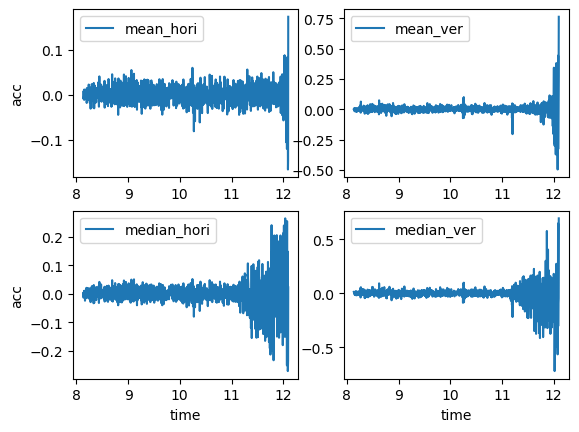

In [15]:
plot_mean_mid_value(df)

Beschleunigungsschwankungen in alle Richtungen werden mit zunehmender Arbeitszeit immer größer

Text(0, 0.5, 'state')

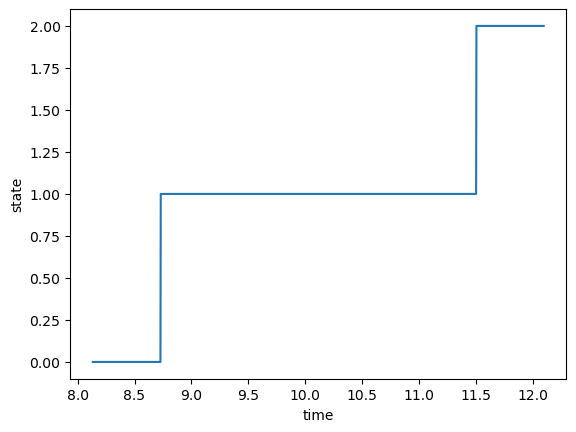

In [18]:
plt.plot(df['datatime'], df['state']) #plot the label according to datatime
plt.xlabel('time')
plt.ylabel('state')

Der Lagerzustand ändert sich mit der Arbeitsdauer, von Label 0 bis 2.
Label(0-2) entsprechen Beschleunigungsänderungen in jeder Richtung.
0-1: Beschleunigungsschwankung ist gering.
2: Beschleunigungsschwankung ist stark.